# Variance, & Covariance


[Mastering Time-Series Analysis & Forecasting - Episode 4](https://youtu.be/TiXJ2bL0Yeg)
</br></br>
By <span style="color: purple;font-weight:bold">Tiger4Code</span>:
www.<span style="color: blue;">Youtube.com/</span><span style="color: red;">@Tiger4Code</span>



# Variance 

This example demonstrates: 
- How to calcualte variance using "numpy" library.
- How the variance changes significantly due to the added outliers and how these outliers visually impact the dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Creation:
- The first time series (values_no_outliers) is generated with random values from a normal distribution.
- The second time series (values_with_outliers) introduces outliers by adding a large value to every 10th day.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a time series of values without outliers
np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values_no_outliers = np.random.normal(loc=50, scale=5, size=100)
time_series_no_outliers = pd.Series(data=values_no_outliers, index=date_range)

# Generate a time series of values with fewer outliers
values_with_outliers = values_no_outliers.copy()
outlier_indices = [0, 20, 50, 80]  # Add outliers at specific points
values_with_outliers[outlier_indices] += 20  # Increase values to create outliers
time_series_with_outliers = pd.Series(data=values_with_outliers, index=date_range)


## Calculate the Variance

In [23]:
# Calculate variance for both series
variance_no_outliers = np.var(values_no_outliers)
variance_with_outliers = np.var(values_with_outliers)

# Define normal range (mean ± 2 * standard deviation)
mean_no_outliers = np.mean(values_no_outliers)
std_no_outliers = np.std(values_no_outliers)
normal_range_no_outliers = (mean_no_outliers - 2 * std_no_outliers, mean_no_outliers + 2 * std_no_outliers)

mean_with_outliers = np.mean(values_with_outliers)
std_with_outliers = np.std(values_with_outliers)
normal_range_with_outliers = (mean_with_outliers - 2 * std_with_outliers, mean_with_outliers + 2 * std_with_outliers)

# Identify outliers
outliers_with_outliers = time_series_with_outliers[(time_series_with_outliers < normal_range_with_outliers[0]) |
                                                   (time_series_with_outliers > normal_range_with_outliers[1])]

# Print variances and normal ranges
print(f"Variance without outliers: {variance_no_outliers:.2f}")
print(f"Normal range without outliers: {normal_range_no_outliers}")
print(f"Variance with outliers: {variance_with_outliers:.2f}")
print(f"Normal range with outliers: {normal_range_with_outliers}")



Variance without outliers: 20.41
Normal range without outliers: (40.44460564658324, 58.516929179475824)
Variance with outliers: 40.74
Normal range with outliers: (37.51559964860445, 63.04593517745462)


# Visualize the Two Time-series

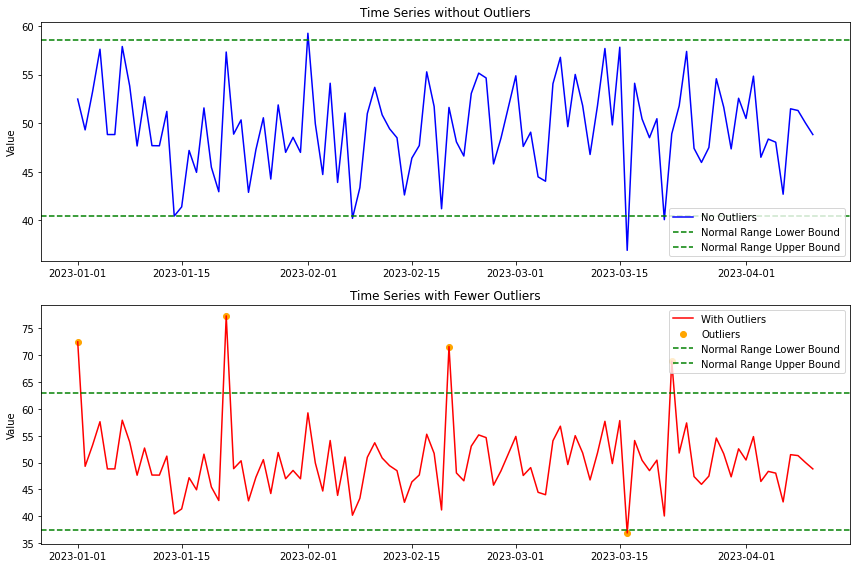

In [24]:
# Visualize both time series
plt.figure(figsize=(12, 8))

# Time series without outliers
plt.subplot(2, 1, 1)
plt.plot(time_series_no_outliers, label="No Outliers", color="blue")
plt.axhline(normal_range_no_outliers[0], color="green", linestyle="--", label="Normal Range Lower Bound")
plt.axhline(normal_range_no_outliers[1], color="green", linestyle="--", label="Normal Range Upper Bound")
plt.title("Time Series without Outliers")
plt.ylabel("Value")
plt.legend()

# Time series with outliers
plt.subplot(2, 1, 2)
plt.plot(time_series_with_outliers, label="With Outliers", color="red")
plt.scatter(outliers_with_outliers.index, outliers_with_outliers.values, color="orange", label="Outliers")
plt.axhline(normal_range_with_outliers[0], color="green", linestyle="--", label="Normal Range Lower Bound")
plt.axhline(normal_range_with_outliers[1], color="green", linestyle="--", label="Normal Range Upper Bound")
plt.title("Time Series with Fewer Outliers")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# # Time series without outliers
# plt.figure(figsize=(12, 8))
# plt.subplot(2, 1, 1)
# plt.plot(time_series_no_outliers, label="Time-series", color="purple")
# plt.axhline(time_series_no_outliers.min(), color="green", linestyle="--", label="Lower Bound")
# plt.axhline(time_series_no_outliers.mean(), color="red", linestyle="--", label="Mean")
# plt.axhline(time_series_no_outliers.max(), color="green", linestyle="--", label="Upper Bound")
# plt.title("Time Series")
# plt.ylabel("Value")
# plt.legend()

# Standard Deviation

In [28]:
import numpy as np
# Example data
data = [10, 12, 14, 16, 18, 20]
# Calculate STD using NumPy
std_dev = np.std(data)

print(f"Standard Deviation using NumPy: {std_dev}")


Standard Deviation using NumPy: 3.415650255319866


# Covariance

The scatter plot below illustrates the relationship between two variables, X and Y, which have a positive covariance of approximately 1.53. This positive covariance indicates that as X increases, Y tends to increase as well, showing a directional relationship between the two variables.
In this case, Y is linearly related to X with some added noise, which is why the points form a general upward trend. The covariance value quantifies this relationship by measuring how much the variables vary together

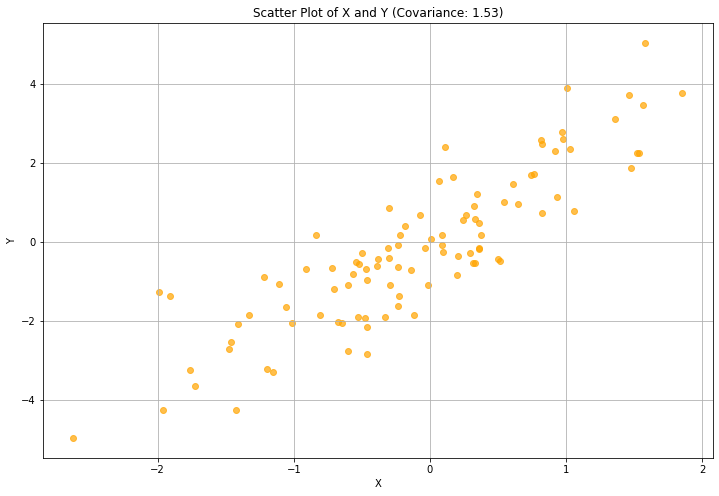

Covariance: 1.531385594421482


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Create two random variables (data sets)
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)  # y is related to x, with some noise

# Create a pandas DataFrame
data = pd.DataFrame({'X': x, 'Y': y})

# Calculate the covariance between X and Y
covariance = data.cov().iloc[0, 1]

# Plot the data to visually show the relationship
plt.scatter(data['X'], data['Y'], alpha=0.7, color="orange")
plt.title(f'Scatter Plot of X and Y (Covariance: {covariance:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

print(f"Covariance: {covariance}")


## Covariance Example

Example below demonstrates the concept of covariance, using the example of two investments' returns.

Positive Covariance

Covariance Matrix:
              Investment A  Investment B
Investment A       0.00313       0.00406
Investment B       0.00406       0.00532



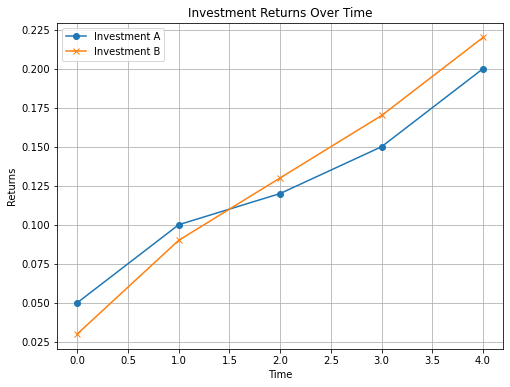

The covariance between Investment A and Investment B is: 0.00406


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example investment returns for two different assets (e.g., stock A and stock B)
investment_A = [0.05, 0.10, 0.12, 0.15, 0.20]
investment_B = [0.03, 0.09, 0.13, 0.17, 0.22]


# Create a DataFrame to hold the data
data = pd.DataFrame({
    'Investment A': investment_A,
    'Investment B': investment_B
})

# Calculate the covariance matrix
cov_matrix = data.cov()
print(f"Covariance Matrix:\n{cov_matrix}\n")

# Visualize the returns of both investments
plt.figure(figsize=(8, 6))
plt.plot(data['Investment A'], label='Investment A', marker='o')
plt.plot(data['Investment B'], label='Investment B', marker='x')
plt.title('Investment Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Extract the covariance between Investment A and Investment B
cov_ab = cov_matrix.loc['Investment A', 'Investment B']
print(f"The covariance between Investment A and Investment B is: {cov_ab}")


Explanation:
Covariance is calculated using pandas.DataFrame.cov() method. It gives you the relationship between two variables.
- If the covariance is positive, it means that as one investment increases in value, the other one tends to do the same (move in the same direction).
- If the covariance is negative, it means the investments tend to move in opposite directions; when one goes up, the other goes down.
- If the covariance is close to zero, it suggests there is no strong relationship between the two investments' returns.

### Negative Covariance 

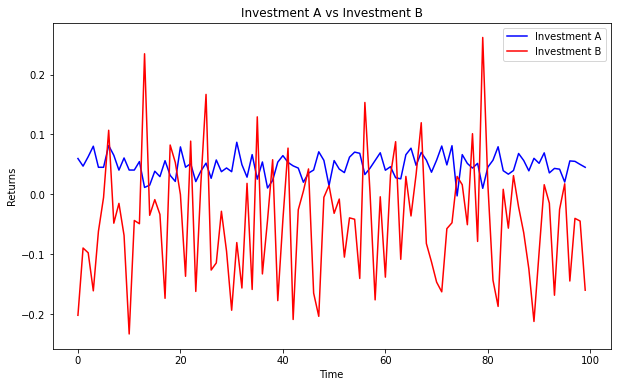

Covariance between Investment A and Investment B: -0.0005662163431297381


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random data for Investment A
np.random.seed(42)  # For reproducibility
investment_a = np.random.normal(0.05, 0.02, size=100)  # Mean return 0.05, Std Dev 0.02

# Modify the data for Investment B to have an inverse relationship with Investment A
investment_b = investment_a * -1 + np.random.normal(0, 0.1, size=100)  # Inverse relationship

# Create a DataFrame for visualization
data = pd.DataFrame({
    'Investment A': investment_a,
    'Investment B': investment_b
})

# Plot both investments
plt.figure(figsize=(10, 6))
plt.plot(data['Investment A'], label='Investment A', color='blue')
plt.plot(data['Investment B'], label='Investment B', color='red')
plt.title('Investment A vs Investment B')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Calculate covariance
covariance = np.cov(investment_a, investment_b)[0, 1]
print(f"Covariance between Investment A and Investment B: {covariance}")


### Covariance between two Random Variables

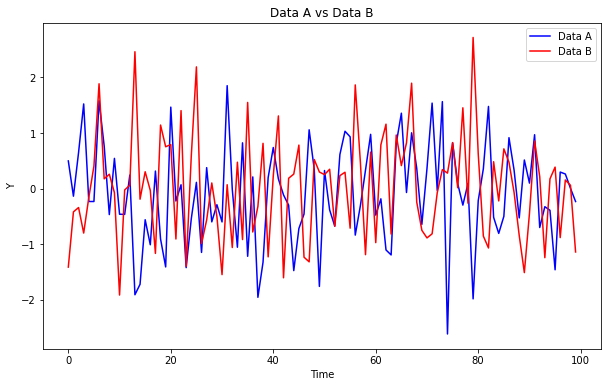

Covariance between x and y: -0.11815419283883716


In [35]:
import numpy as np

# Generate two random arrays of data with zero covariance
np.random.seed(42)
x = np.random.randn(100)  # 100 random samples from a standard normal distribution
y = np.random.randn(100)  # Another 100 random samples, independent of x

# Compute covariance between x and y
cov_matrix = np.cov(x, y)
cov_xy = cov_matrix[0, 1]

# Plot both investments
plt.figure(figsize=(10, 6))
plt.plot(x, label='Data A', color='blue')
plt.plot(y, label='Data B', color='red')
plt.title('Data A vs Data B')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"Covariance between x and y: {cov_xy}")
